####All the necessary imports

In [ ]:
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         8877948 kB
MemAvailable:   11301920 kB
Buffers:           85512 kB
Cached:          1371828 kB
SwapCached:            0 kB
Active:           794920 kB
Inactive:        3396304 kB
Active(anon):       1224 kB
Inactive(anon):  1573104 kB
Active(file):     793696 kB
Inactive(file):  1823200 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               688 kB
Writeback:             0 kB
AnonPages:       2733960 kB
Mapped:           397956 kB
Shmem:              1268 kB
KReclaimable:      97052 kB
Slab:             129944 kB
SReclaimable:      97052 kB
SUnreclaim:        32892 kB
KernelStack:        5664 kB
PageTables:        41504 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    5523904 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       10516 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 26.8 MB/s 


In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 32.4 MB/s 


In [ ]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

#from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.cluster import AgglomerativeClustering
#from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tslearn.clustering import silhouette_score
from tslearn.metrics import dtw


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/



####Preparing the data
The data preparation process is similar to such in K-Means procedure, so I am going to skip the description

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks
df_vars = pd.read_excel("data_by_description.xlsx", skiprows = [1,2], usecols = "B : AR", convert_float=False) #converters={'OSA3S16SO.PV':float, 'OSA4S20SO.PV':float}) #dtype = {'OSA3S16SO.PV':np.float64, 'OSA4S20SO.PV':np.float64})
df_vars.head()

/content/drive/My Drive/Colab Notebooks


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_float is deprecated and will be removed in a future version
  


,FI60320.PV,FIC60324.MV,FIC60324.PV,FIC60324.SV,FIC60327.MV,FIC60327.PV,FIC60327.SV,FIC60331.MV,FIC60331.PV,FIC60331.SV,...,OSA3S16SO.PV,OSA3S16ZN.PV,OSA3S17FE.PV,OSA3S17PB.PV,OSA3S17SO.PV,OSA3S17ZN.PV,OSA4S20FE.PV,OSA4S20PB.PV,OSA4S20SO.PV,OSA4S20ZN.PV
0,476.614716,47.088615,249.305069,250.0,49.441315,299.838257,300.0,61.200512,502.976379,500.0,...,18.4841,11.1213,6.95405,2.25000,41.75,42.778,11.88,1.22656,28.25,4.01969
1,480.224030,47.102135,249.800568,250.0,49.400452,300.065247,300.0,61.243736,500.191132,500.0,...,18.4841,11.1213,6.90372,2.45313,41.75,42.778,11.88,1.22656,28.25,4.01969
2,481.814880,47.115654,250.387115,250.0,49.359592,300.428558,300.0,61.286961,497.405884,500.0,...,16.635799,11.1213,6.90372,2.45313,41.75,42.778,11.88,1.22656,28.25,4.01969
3,477.350372,47.129173,250.973663,250.0,49.110222,300.791901,300.0,61.330185,494.620636,500.0,...,16.635799,11.1213,6.90372,2.45313,41.75,42.778,11.88,1.22656,28.25,4.01969
4,472.885864,47.142693,251.560211,250.0,48.814049,301.155243,300.0,61.373409,493.097168,500.0,...,16.635799,11.1213,6.90372,2.45313,41.75,42.778,11.88,1.22656,28.25,4.01969


In [ ]:
df_descriptions = pd.read_excel("data_by_description.xlsx", nrows = 2, index_col = 0, usecols = "A : AR", convert_float=False) #converters={'OSA3S16SO.PV':float, 'OSA4S20SO.PV':float}) #dtype = {'OSA3S16SO.PV':np.float64, 'OSA4S20SO.PV':np.float64})
df_descriptions.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_float is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,FI60320.PV,FIC60324.MV,FIC60324.PV,FIC60324.SV,FIC60327.MV,FIC60327.PV,FIC60327.SV,FIC60331.MV,FIC60331.PV,FIC60331.SV,...,OSA3S16SO.PV,OSA3S16ZN.PV,OSA3S17FE.PV,OSA3S17PB.PV,OSA3S17SO.PV,OSA3S17ZN.PV,OSA4S20FE.PV,OSA4S20PB.PV,OSA4S20SO.PV,OSA4S20ZN.PV
Description,Feed rate,Air flow to FC23,Air flow to FC23,Air flow to FC23,Air flow to FC24,Air flow to FC24,Air flow to FC24,Air flow to FC25,Air flow to FC25,Air flow to FC25,...,Feed percent solids,Feed Zn,Primary Rougher Con FE,Primary Rougher Con PB,Primary Rougher Con SO,Primary Rougher Con Zn,Primary Rougher Tail FE,Primary Rougher Tail PB,Primary Rougher Tail SO,Primary Rougher Tail Zn
UOM,l/s,m3/hr,m3/hr,m3/hr,m3/hr,m3/hr,m3/hr,m3/hr,m3/hr,m3/hr,...,%,%,%,%,%,%,%,%,%,%


In [ ]:
#Dropping all variables exept "Process values"
df_pvs = df_vars.filter(regex='.PV$', axis=1)
df_descriptions = df_descriptions.filter(regex='.PV$', axis=1)

#Dropping all the variables exept output
df_input_pvs = df_pvs.drop(df_pvs.filter(regex='OSA').columns, axis=1)
df_descriptions = df_descriptions.drop(df_descriptions.filter(regex='OSA').columns, axis=1)
df_input_pvs.head()

,FI60320.PV,FIC60324.PV,FIC60327.PV,FIC60331.PV,FIC60334.PV,FIC60620.PV,FIC60624.PV,FIC60625.PV,FIC6492.PV,LIC60330.PV,LIC60337.PV
0,476.614716,249.305069,299.838257,502.976379,501.774170,40.013195,3.342017,2.011030,3.601177,-40.451881,-38.070877
1,480.224030,249.800568,300.065247,500.191132,500.189575,40.017082,3.342406,2.010707,3.601198,-39.254414,-36.475201
2,481.814880,250.387115,300.428558,497.405884,498.604980,40.023552,3.342796,2.010384,3.601219,-37.994854,-34.676548
3,477.350372,250.973663,300.791901,494.620636,497.020416,40.037750,3.343185,2.010061,3.601240,-37.970345,-33.226051
4,472.885864,251.560211,301.155243,493.097168,495.435822,40.051949,3.343575,2.009738,3.601261,-38.760761,-33.299225


Same as with k-means, only a period of a week is used

In [ ]:
data_array = np.array(df_input_pvs.head(10080).T.values)

In [ ]:
datetime = pd.read_excel("data_by_description.xlsx", skiprows = [1,2], usecols=[0], names = ["Date/time"])

In [ ]:
datetime_ex = datetime.iloc[:10080]

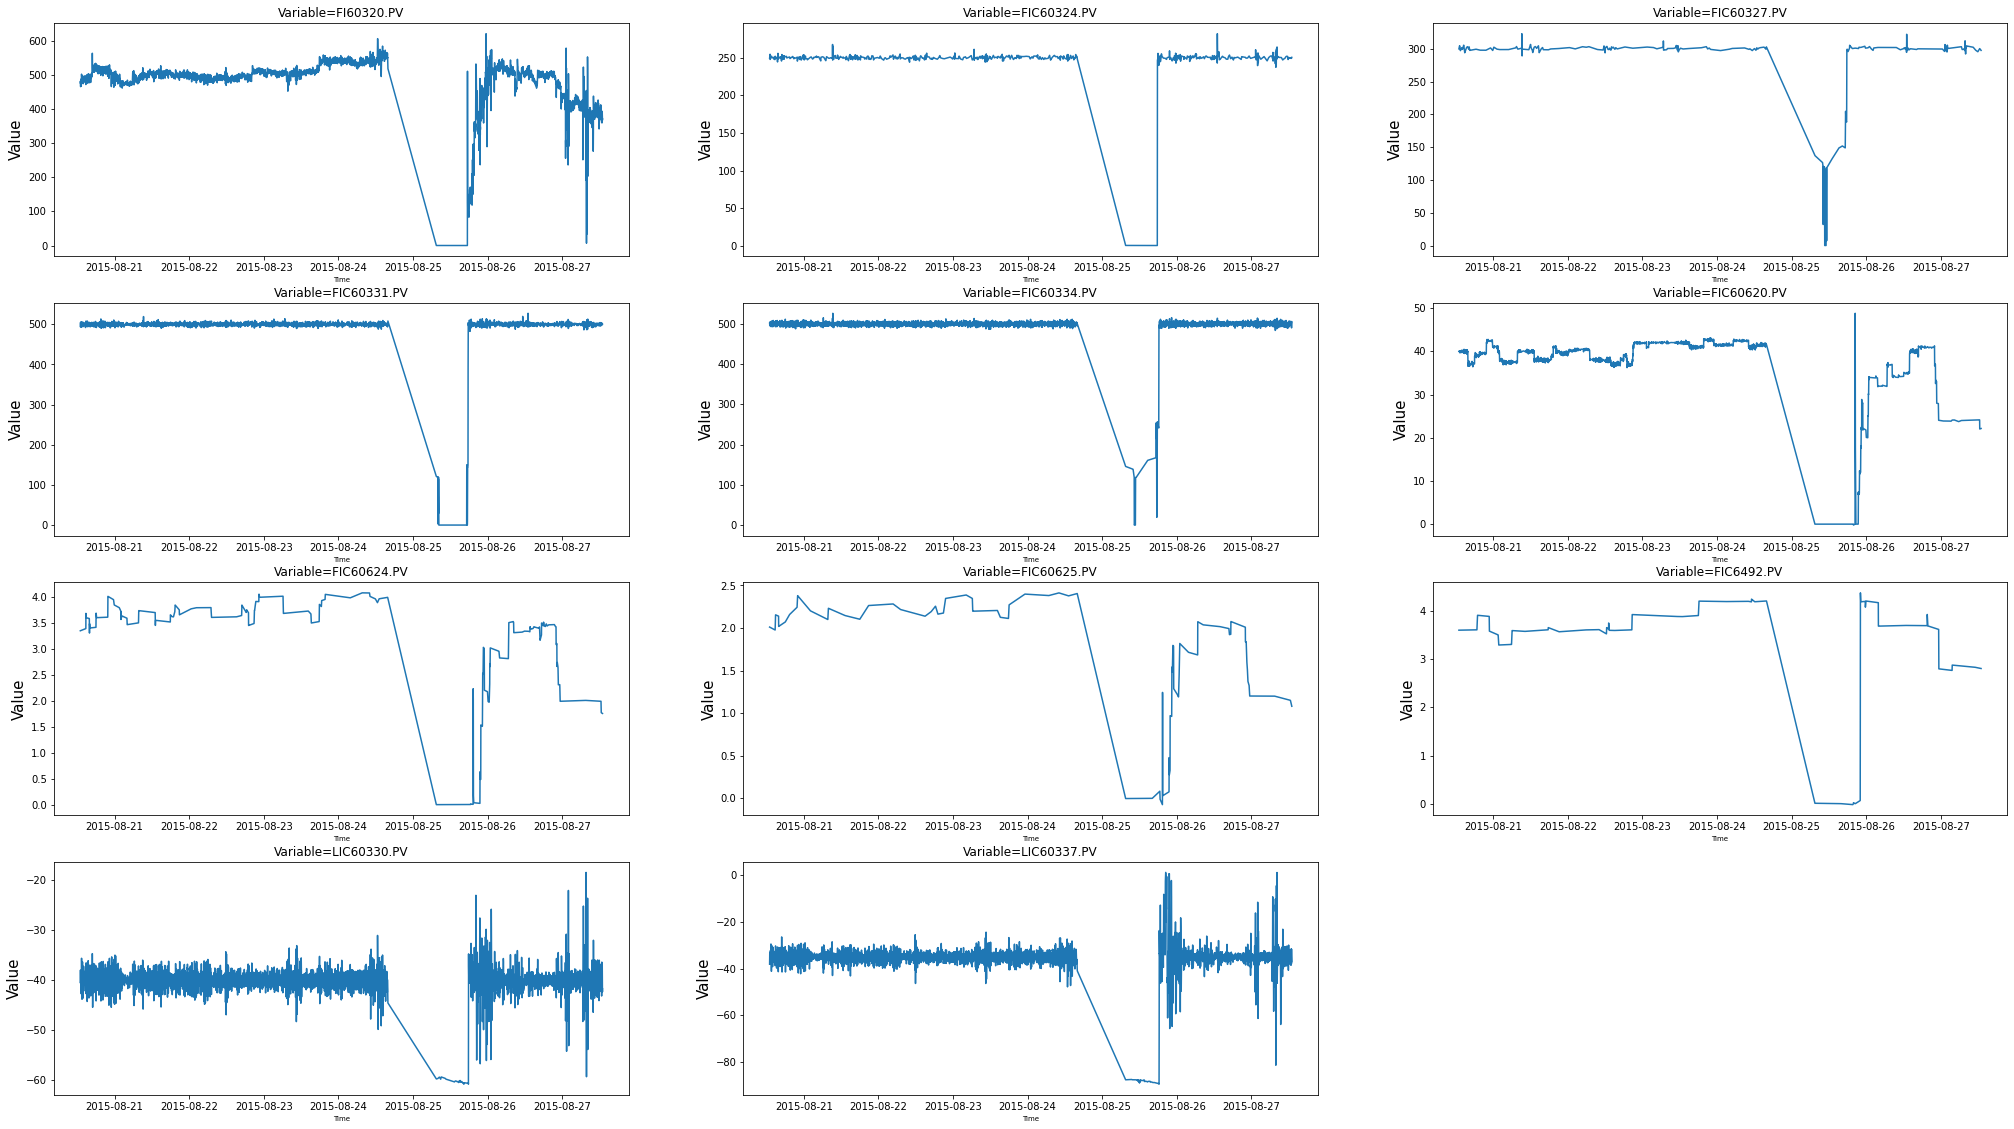

In [ ]:
plt.figure(figsize=(35,30))
for j in range(1,12):
  plt.subplot(6,3,j)
  plt.plot(datetime_ex,df_input_pvs.head(10080).iloc[:, (j-1)])
  plt.ylabel('Value',fontsize=15)
  plt.xlabel('Time',fontsize=7)
  plt.title('Variable=%s'%(df_input_pvs.columns[j-1]),fontsize=12)
  #plt.ylim(data_array.min(),data_array.max())

In [ ]:
model1 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='complete', compute_distances=True)
model1.fit_predict(data_array)

array([1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
model1.distances_

array([4.58301054e+01, 1.54020221e+02, 1.04899356e+03, 3.33981642e+03,
       3.71516932e+03, 6.46840473e+03, 6.82915822e+03, 7.60207561e+03,
       2.41389314e+04, 5.14690989e+04])

####Perfofming clustering

For hierarchical clustering distance matrix is computed prior to actual clustering. Results of clustering are presented in the form of a dendrogram

In [ ]:
# Computing distance matrix
n_series = len(data_array)
distance_matrix = np.zeros(shape=(n_series, n_series))

for i in range(n_series):
  for j in range(n_series):
    x = data_array[i]
    y = data_array[j]
    if i != j:
      dist = euclidean(x,y)
      distance_matrix[i, j] = dist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


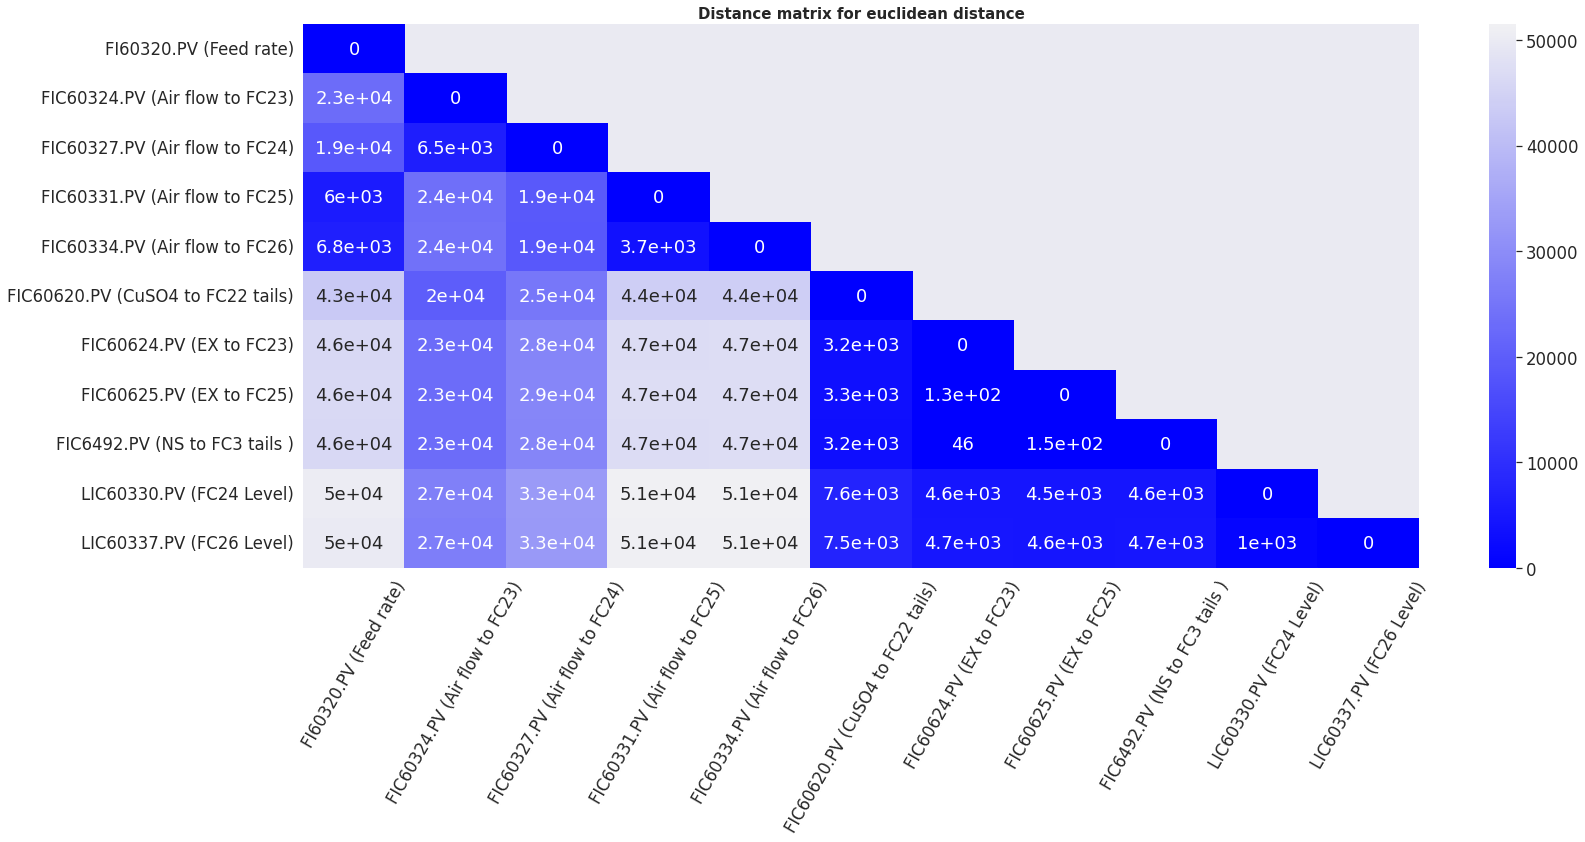

In [ ]:
plt.figure(figsize=(25, 10))
#plt.figure(figsize=(20, 8))
sns.set(font_scale=1.5)
palette = sns.light_palette("blue", n_colors=10000, reverse = True)

# I am masking everything above the main diagonal
mask = np.zeros_like(distance_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Displaying diagonal elements as well
mask[np.diag_indices_from(mask)] = False


ax = sns.heatmap(distance_matrix, annot=True, cmap = palette, mask = mask)
texts = [t.get_text() for t in ax.get_xticklabels()]
texts = [df_descriptions.columns[t] +  ' (' + df_descriptions.loc['Description'][t] + ')' for t in range(len(texts))]
ax.set_yticklabels(texts, rotation = 0);
ax.set_xticklabels(texts,rotation=60);

plt.title("Distance matrix for euclidean distance",fontsize=15, fontweight = "bold")
plt.show();

In [ ]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram, linkage

def hierarchical_clustering(dist_mat, method = 'complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    # if method == 'single':
    #     Z = single(distance_matrix)
    # if method == 'average':
    #     Z = average(distance_matrix)

    fig = plt.figure(figsize=(35, 15))
    labels = [df_descriptions.columns[t] +  ' (' + df_descriptions.loc['Description'][t] + ')' for t in range(len(df_descriptions.columns))]
    dn = dendrogram(Z, labels = labels, leaf_font_size = 10)
    plt.axhline(y=21000, c='black', lw=1, linestyle='dashed')
    #plt.axhline(y=15000, c='bblack', lw=1, linestyle='dashed')
    plt.title(f"Dendrogram for Hierarchical Clustering based on euclidean distance", fontsize = 12, fontweight="bold")
    plt.show()

    return Z

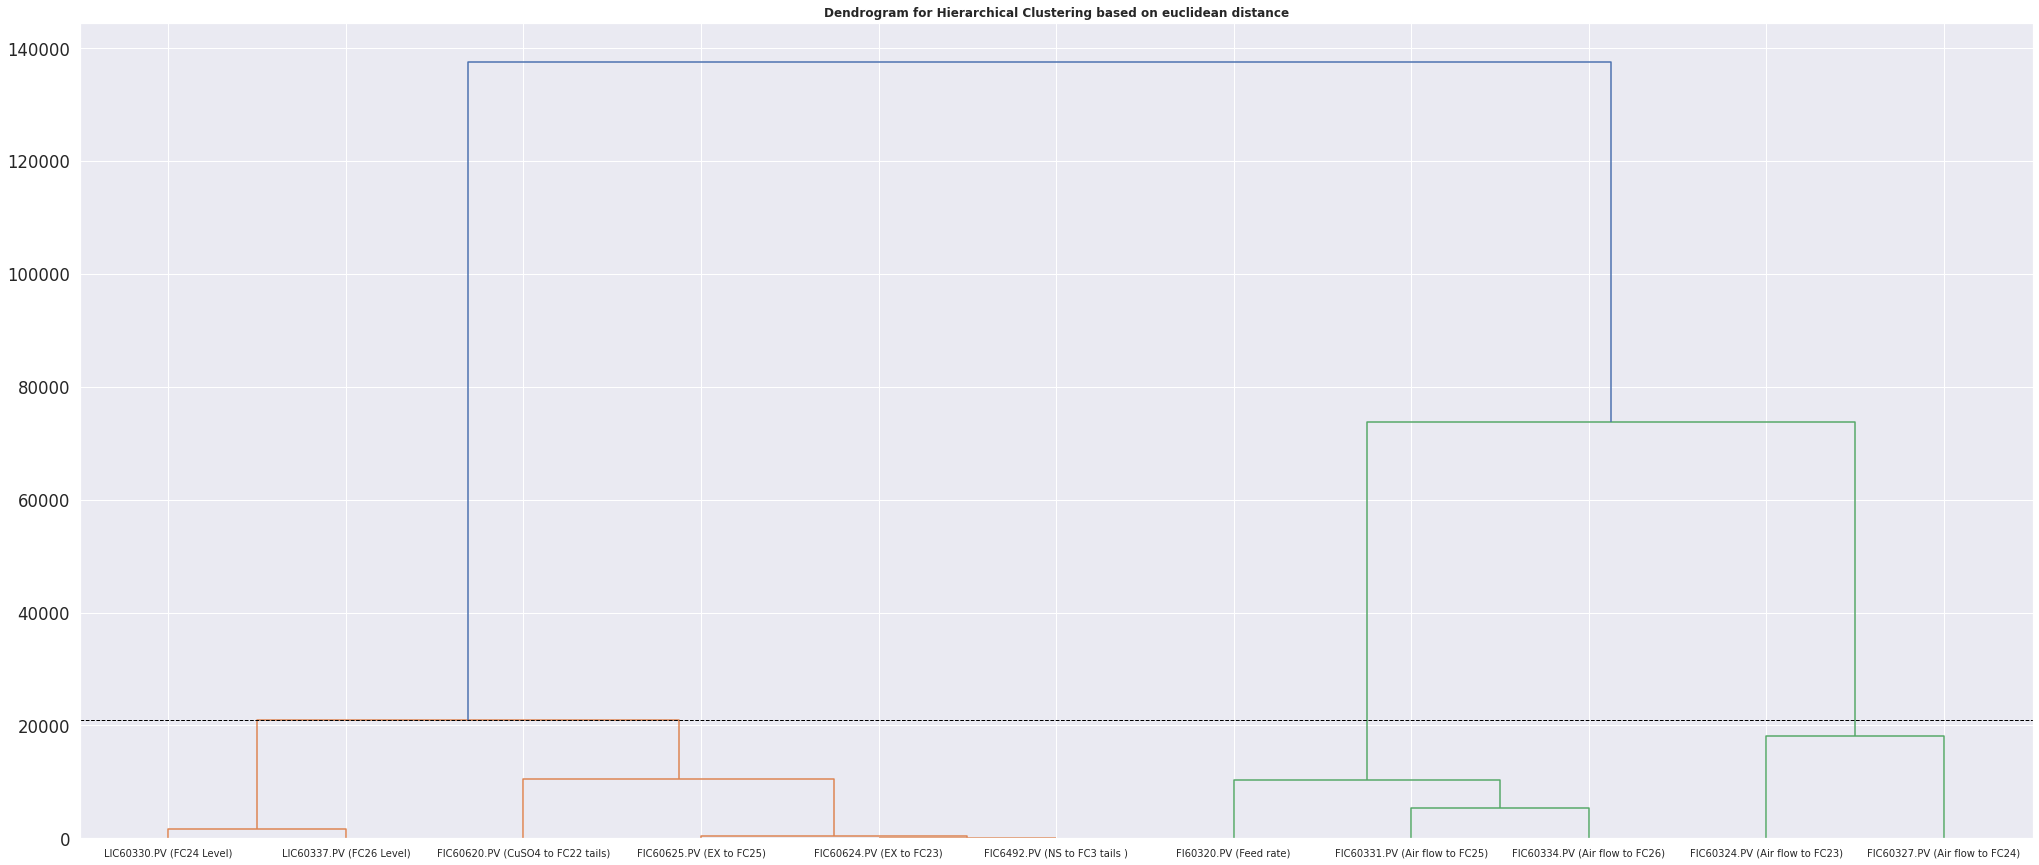

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix)

In [ ]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels_3 = fcluster(linkage_matrix, 3, criterion='maxclust')
print("For 3 clusters labels are: %s"%cluster_labels_3)
#>> 3 unique clusters
cluster_labels_4 = fcluster(linkage_matrix, 4, criterion='maxclust')
print("For 4 clusters labels are: %s"%cluster_labels_4)
#>> 4 unique clusters

For 3 clusters labels are: [2 3 3 2 2 1 1 1 1 1 1]
For 4 clusters labels are: [3 4 4 3 3 2 2 2 2 1 1]


In [ ]:
print("Mean silhouette value for 3 clusters is: %s"%silhouette_score(distance_matrix, cluster_labels_3, metric="precomputed"))
print("Mean silhouette value for 4 clusters is: %s"%silhouette_score(distance_matrix, cluster_labels_4, metric="precomputed"))

Mean silhouette value for 3 clusters is: 0.7998112244225943
Mean silhouette value for 4 clusters is: 0.7285859425461219


Hierarchical Clustering requires a precomputed distance matrix. The distance between samples is measured with DTW metric

In [ ]:
# Computing distance matrix
n_series = len(data_array)
distance_matrix = np.zeros(shape=(n_series, n_series))

for i in range(n_series):
  for j in range(n_series):
    x = data_array[i]
    y = data_array[j]
    if i != j:
      dist = dtw(x, y)
      distance_matrix[i, j] = dist

A distance matrix can be visualised to show which variables are closer to each other based on DTW metric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


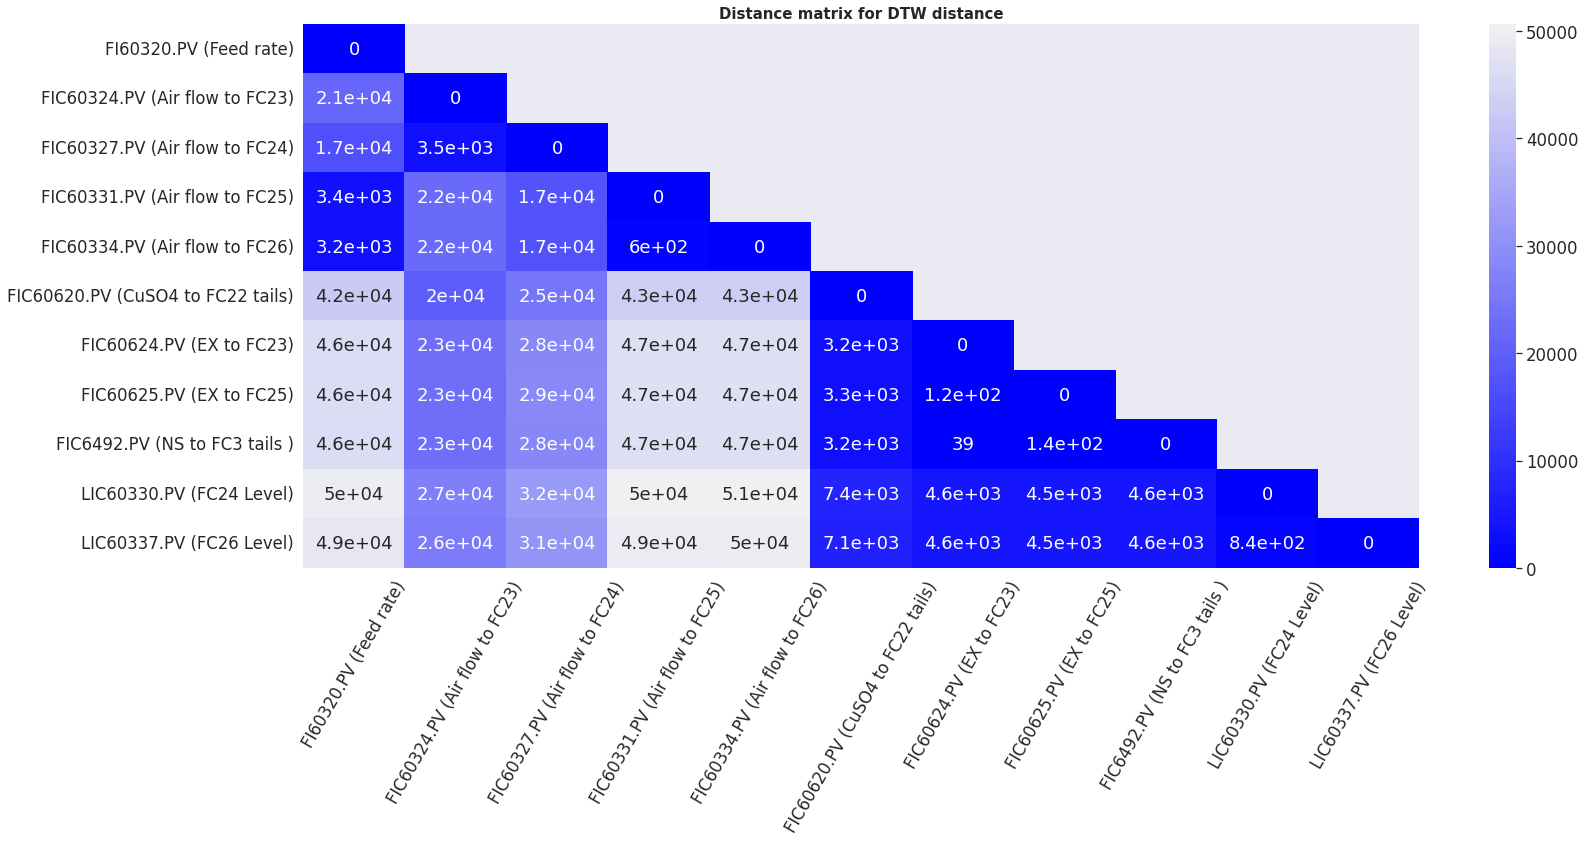

In [ ]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=1.5)
palette = sns.light_palette("blue", n_colors=10000, reverse = True)

# I am masking everything above the main diagonal
mask = np.zeros_like(distance_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Displaying diagonal elements as well
mask[np.diag_indices_from(mask)] = False


ax = sns.heatmap(distance_matrix, annot=True, cmap = palette, mask = mask)
texts = [t.get_text() for t in ax.get_xticklabels()]
texts = [df_descriptions.columns[t] +  ' (' + df_descriptions.loc['Description'][t] + ')' for t in range(len(texts))]
ax.set_yticklabels(texts, rotation = 0);
ax.set_xticklabels(texts,rotation=60);

plt.title("Distance matrix for DTW distance",fontsize=15, fontweight = "bold")
plt.show();

Distance matrix allows to sugest 3 distinct clusters

The next step is to calculate linkage matrix that will allow to identify clusters. Linkage matrix shows the variables that vere merged into a cluster, the iteration and the distance between merged variables. The process of pairwise merging of variables into clusters can be visualized with a dendrogram

In [ ]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram, linkage

def hierarchical_clustering(dist_mat, method = 'complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    # if method == 'single':
    #     Z = single(distance_matrix)
    # if method == 'average':
    #     Z = average(distance_matrix)

    fig = plt.figure(figsize=(23, 12))
    labels = [df_descriptions.columns[t] +  ' (' + df_descriptions.loc['Description'][t] + ')' for t in range(len(df_descriptions.columns))]
    dn = dendrogram(Z, labels = labels, leaf_font_size = 7)
    plt.axhline(y=20000, c='black', lw=1, linestyle='dashed')
    #plt.axhline(y=15000, c='black', lw=1, linestyle='dashed')
    plt.title(f"Dendrogram for Hierarchical clustering based on DTW distance", fontsize = 12, fontweight="bold")
    plt.show()

    return Z

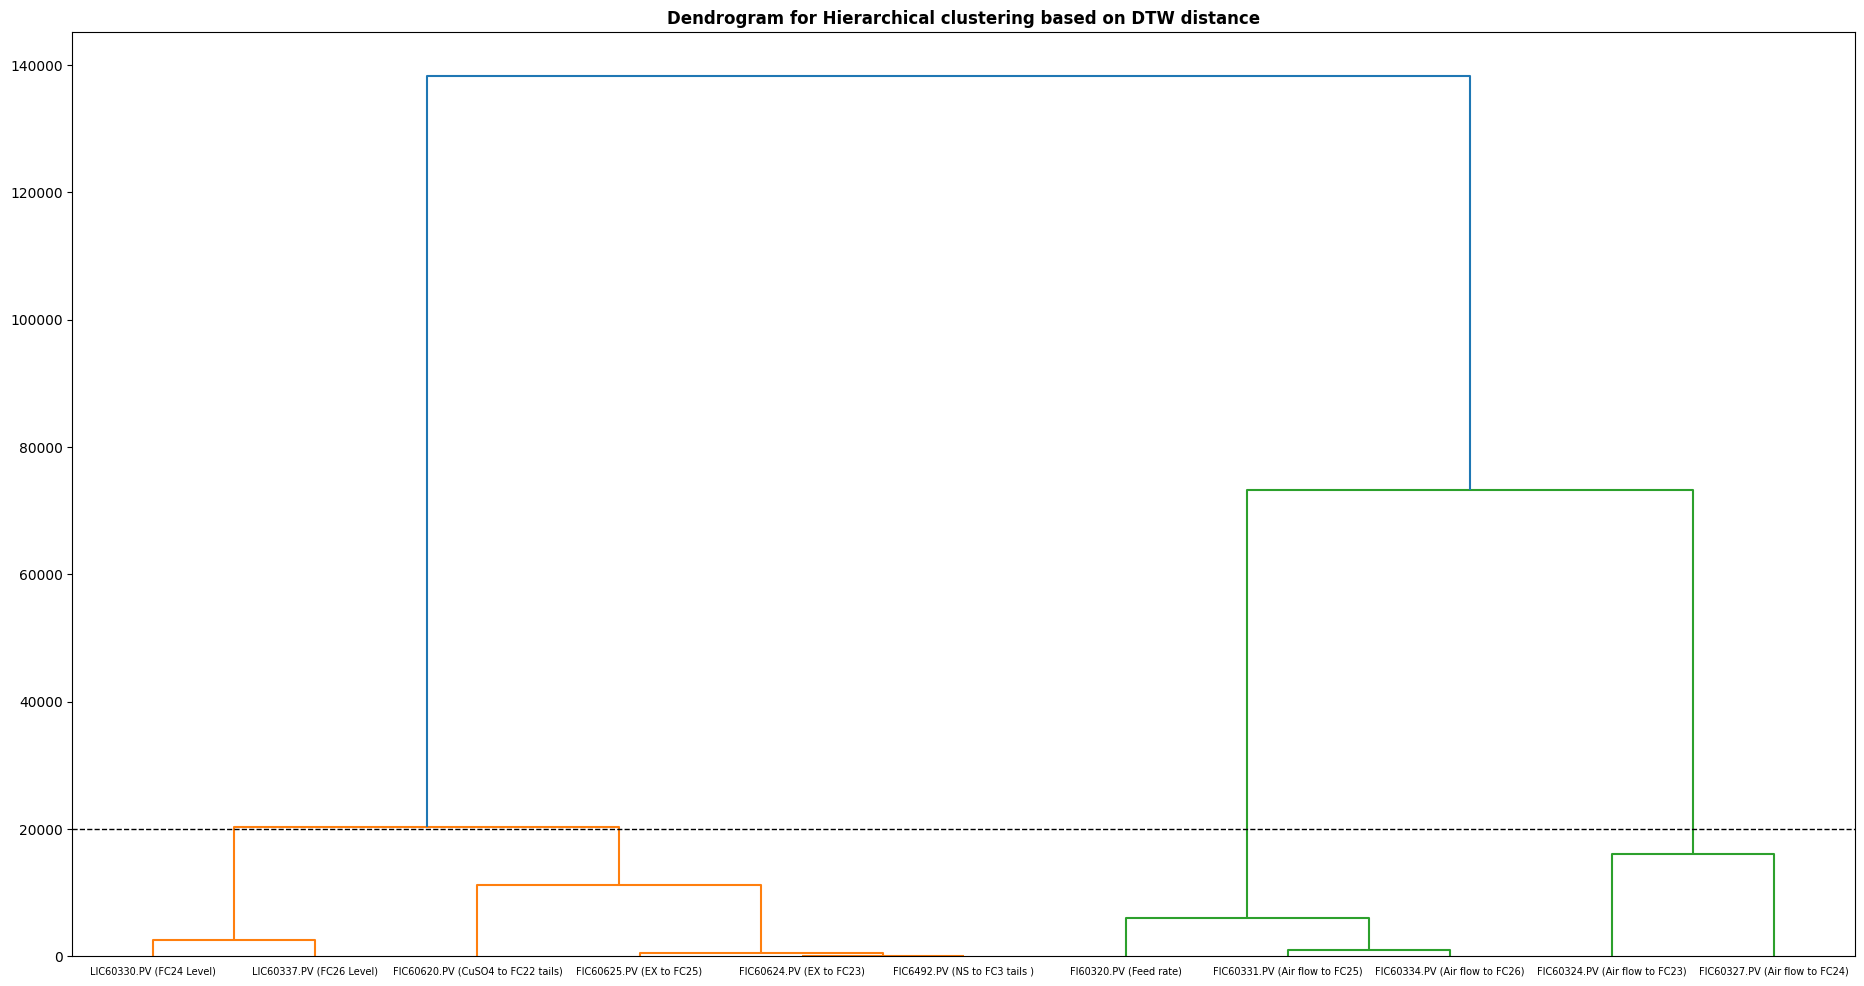

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix)

Dendrogram shows the pairwise merging, and also allows to see 3 distinctive clusters. The line at the distance of 20000 shows the point where those 3 clusters are identified

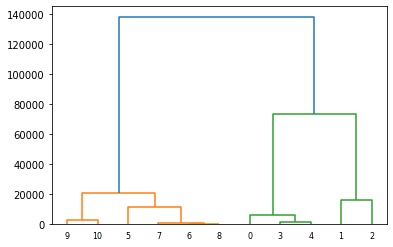

In [ ]:
#just small additional visualisation with indexes
dendrogram(linkage_matrix, leaf_font_size=8, )
plt.show()

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    fig = plt.figure(figsize=(35, 15))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram based on DTW distance')
        plt.xlabel('Variable')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

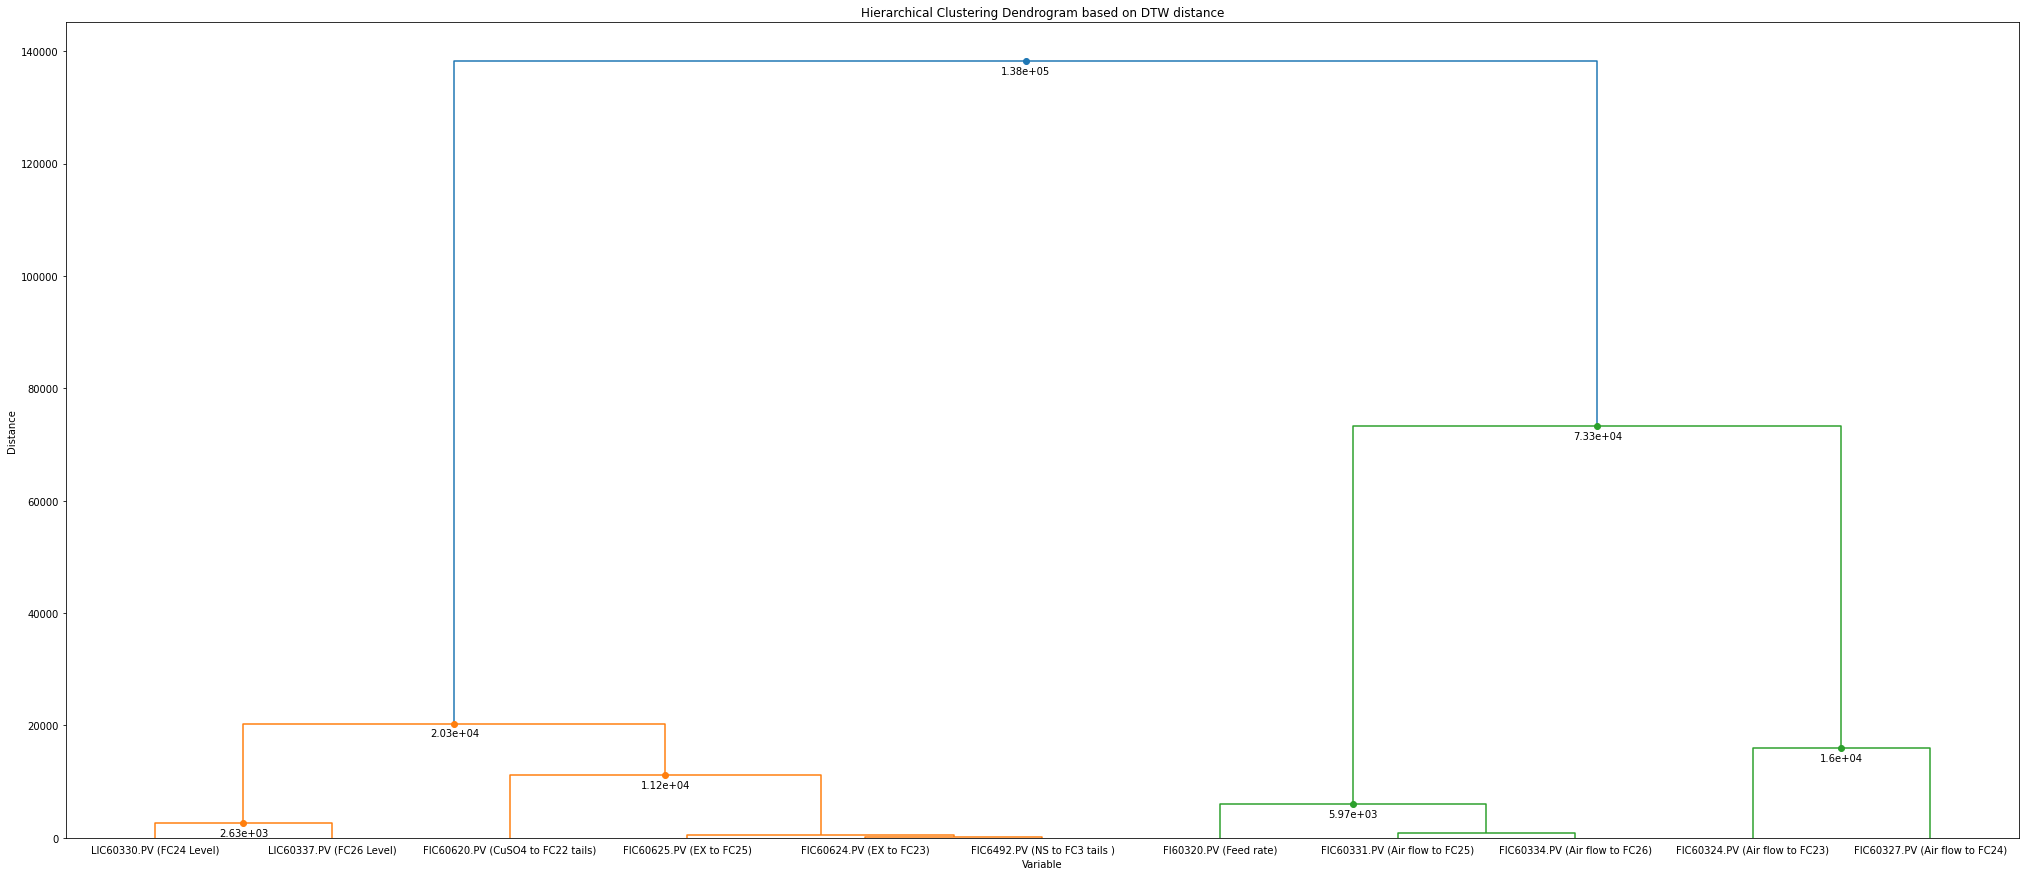

<Figure size 2160x1800 with 0 Axes>

In [ ]:
fancy_dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=0.,
    leaf_font_size=10.,
    show_contracted=True,
    labels = [df_descriptions.columns[t] +  ' (' + df_descriptions.loc['Description'][t] + ')' for t in range(len(df_descriptions.columns))],
    annotate_above=1000,  # useful in small plots so annotations don't overlap
)
plt.figure(figsize=(30,25))
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels_3 = fcluster(linkage_matrix, 3, criterion='maxclust')
print("For 3 clusters labels are: %s"%cluster_labels_3)
#>> 3 unique clusters
cluster_labels_4 = fcluster(linkage_matrix, 4, criterion='maxclust')
print("For 4 clusters labels are: %s"%cluster_labels_4)
#>> 4 unique clusters

# # hand-select an appropriate cut-off on the dendrogram
# cluster_labels = fcluster(linkage_matrix, 60000, criterion='distance')
# print(np.unique(cluster_labels))
# #>> 3 unique clusters
# cluster_labels = fcluster(linkage_matrix, 40000, criterion='distance')
# #print(np.unique(cluster_labels))
# #>> 2 unique clusters

For 3 clusters labels are: [2 3 3 2 2 1 1 1 1 1 1]
For 4 clusters labels are: [3 4 4 3 3 2 2 2 2 1 1]


Hierarchical clustering identifies the same clusters as k-means does. Checking silhouette score for 3 and 4 clusters to compare with k-means results:

In [ ]:
silhouette_score(distance_matrix, cluster_labels_3, metric="precomputed")

0.8592708628562488

In [ ]:
silhouette_score(distance_matrix, cluster_labels_4, metric="precomputed")

0.7953440187872759

####Showing clustering results
Even though results are similar to k-means, they are still visualised

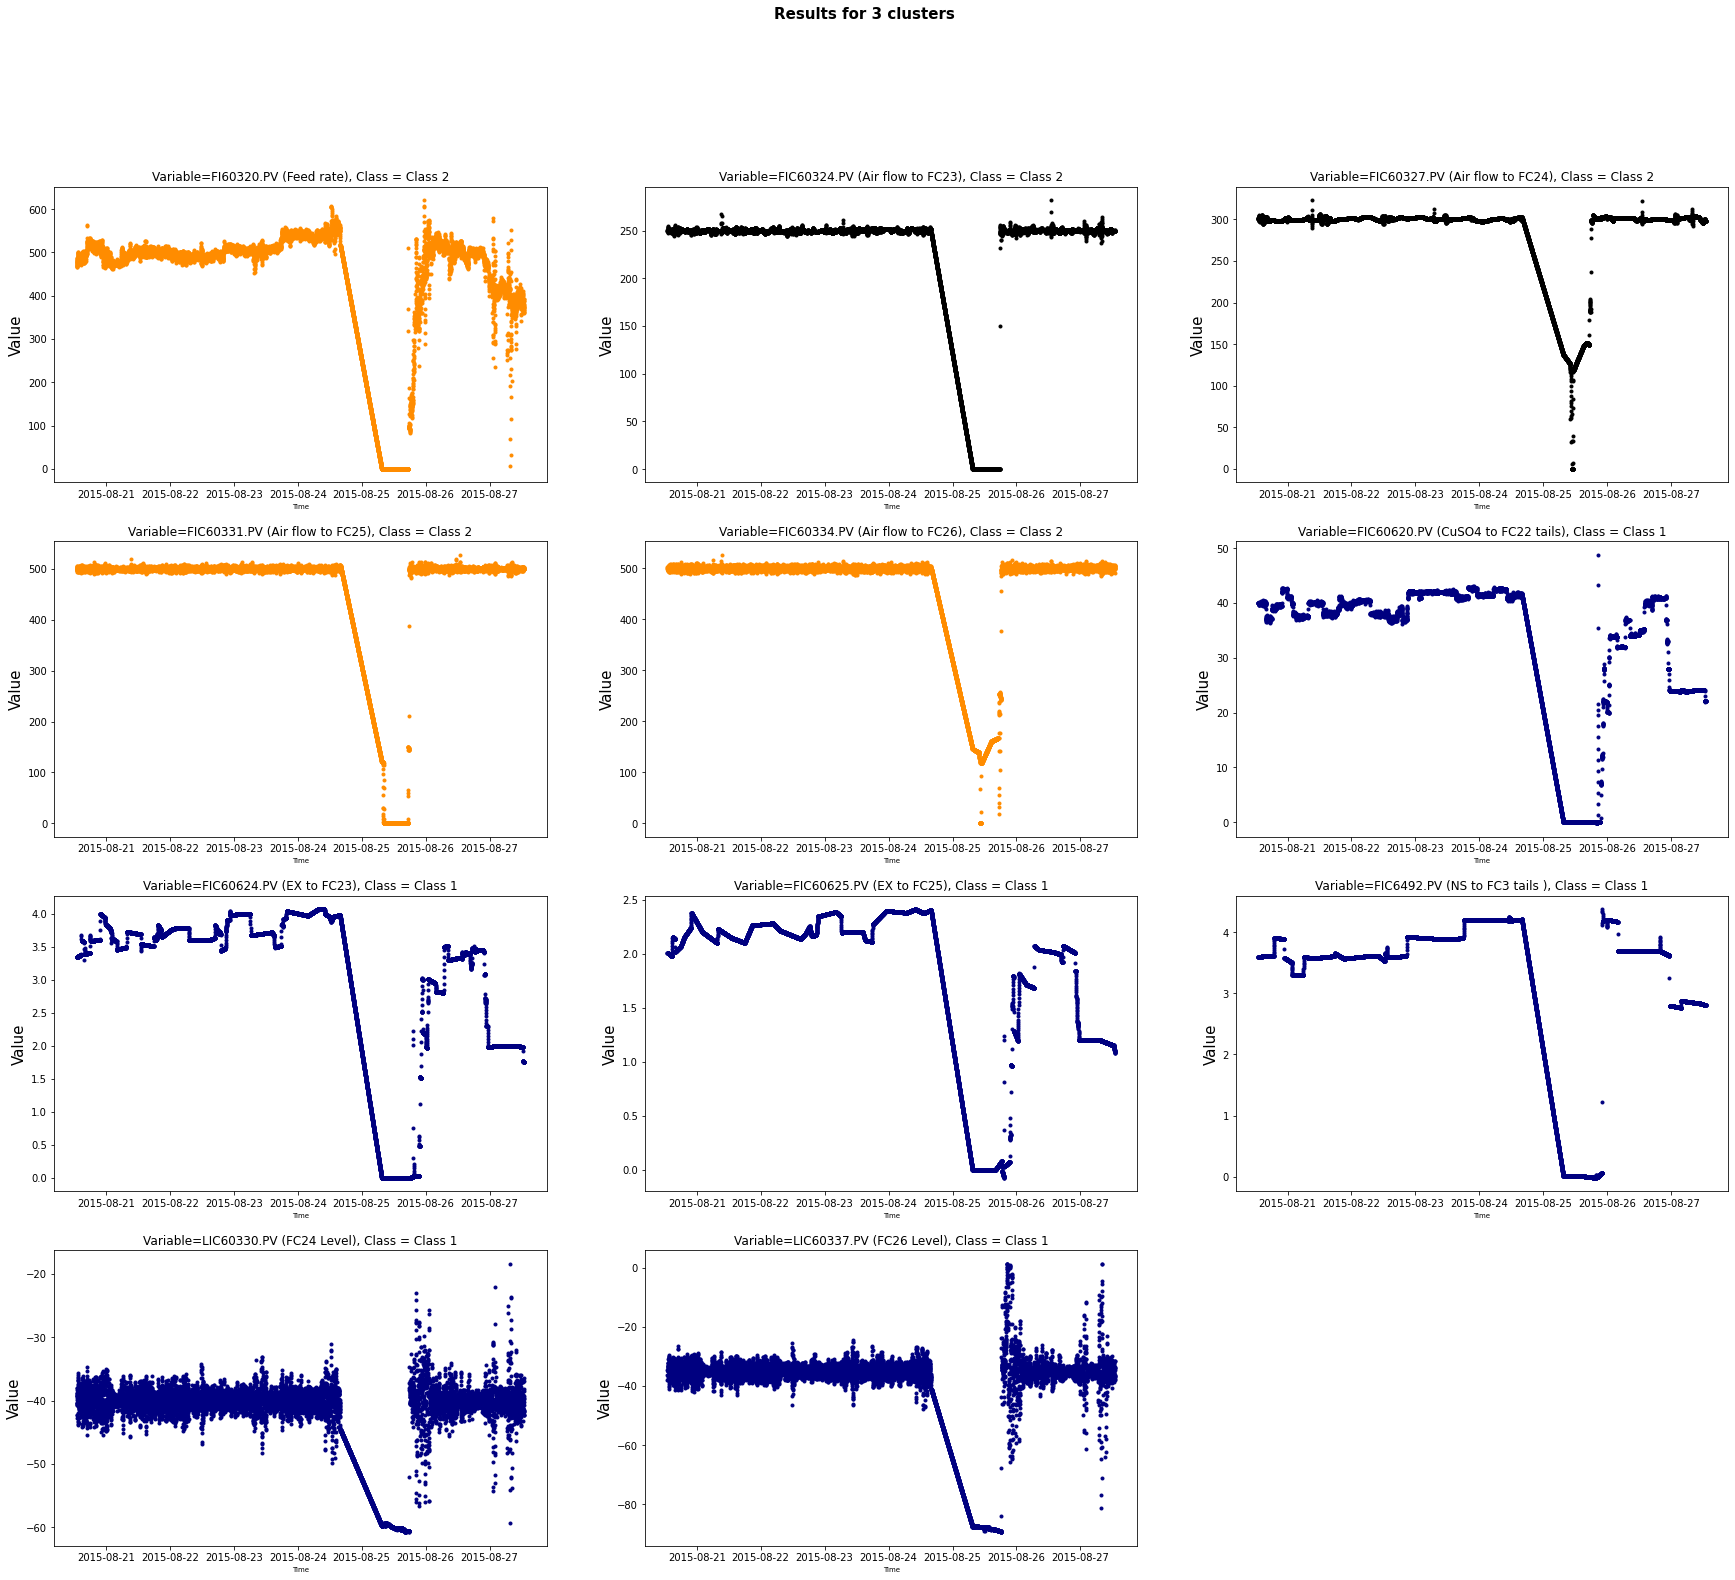

In [ ]:
plt.figure(figsize=(30,25))
#k_dict = {'1':0,'2':0,'3':1,'4':1,'5':2,'6':2}
colors = ['darkorange']*1  + ['k']* 2 + ['darkorange']*2+ ['navy'] *6
Names = ['Class 2']*1+['Class 2']*2+['Class 2']*2+['Class 1']*6
for j in range(1,12):
    plt.subplot(4,3,j)
    #k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x, data_array[j-1],'.',color=colors[j-1])
    plt.ylabel('Value',fontsize=15)
    plt.xlabel('Time',fontsize=7)
    plt.title('Variable=%s, Class = %s'%(df_input_pvs.columns[j-1] + ' (' + df_descriptions[df_input_pvs.columns[j-1]]['Description'] + ')',Names[j-1]),fontsize=12)

plt.suptitle("Results for 3 clusters", fontsize = 15, fontweight="bold")
plt.show();

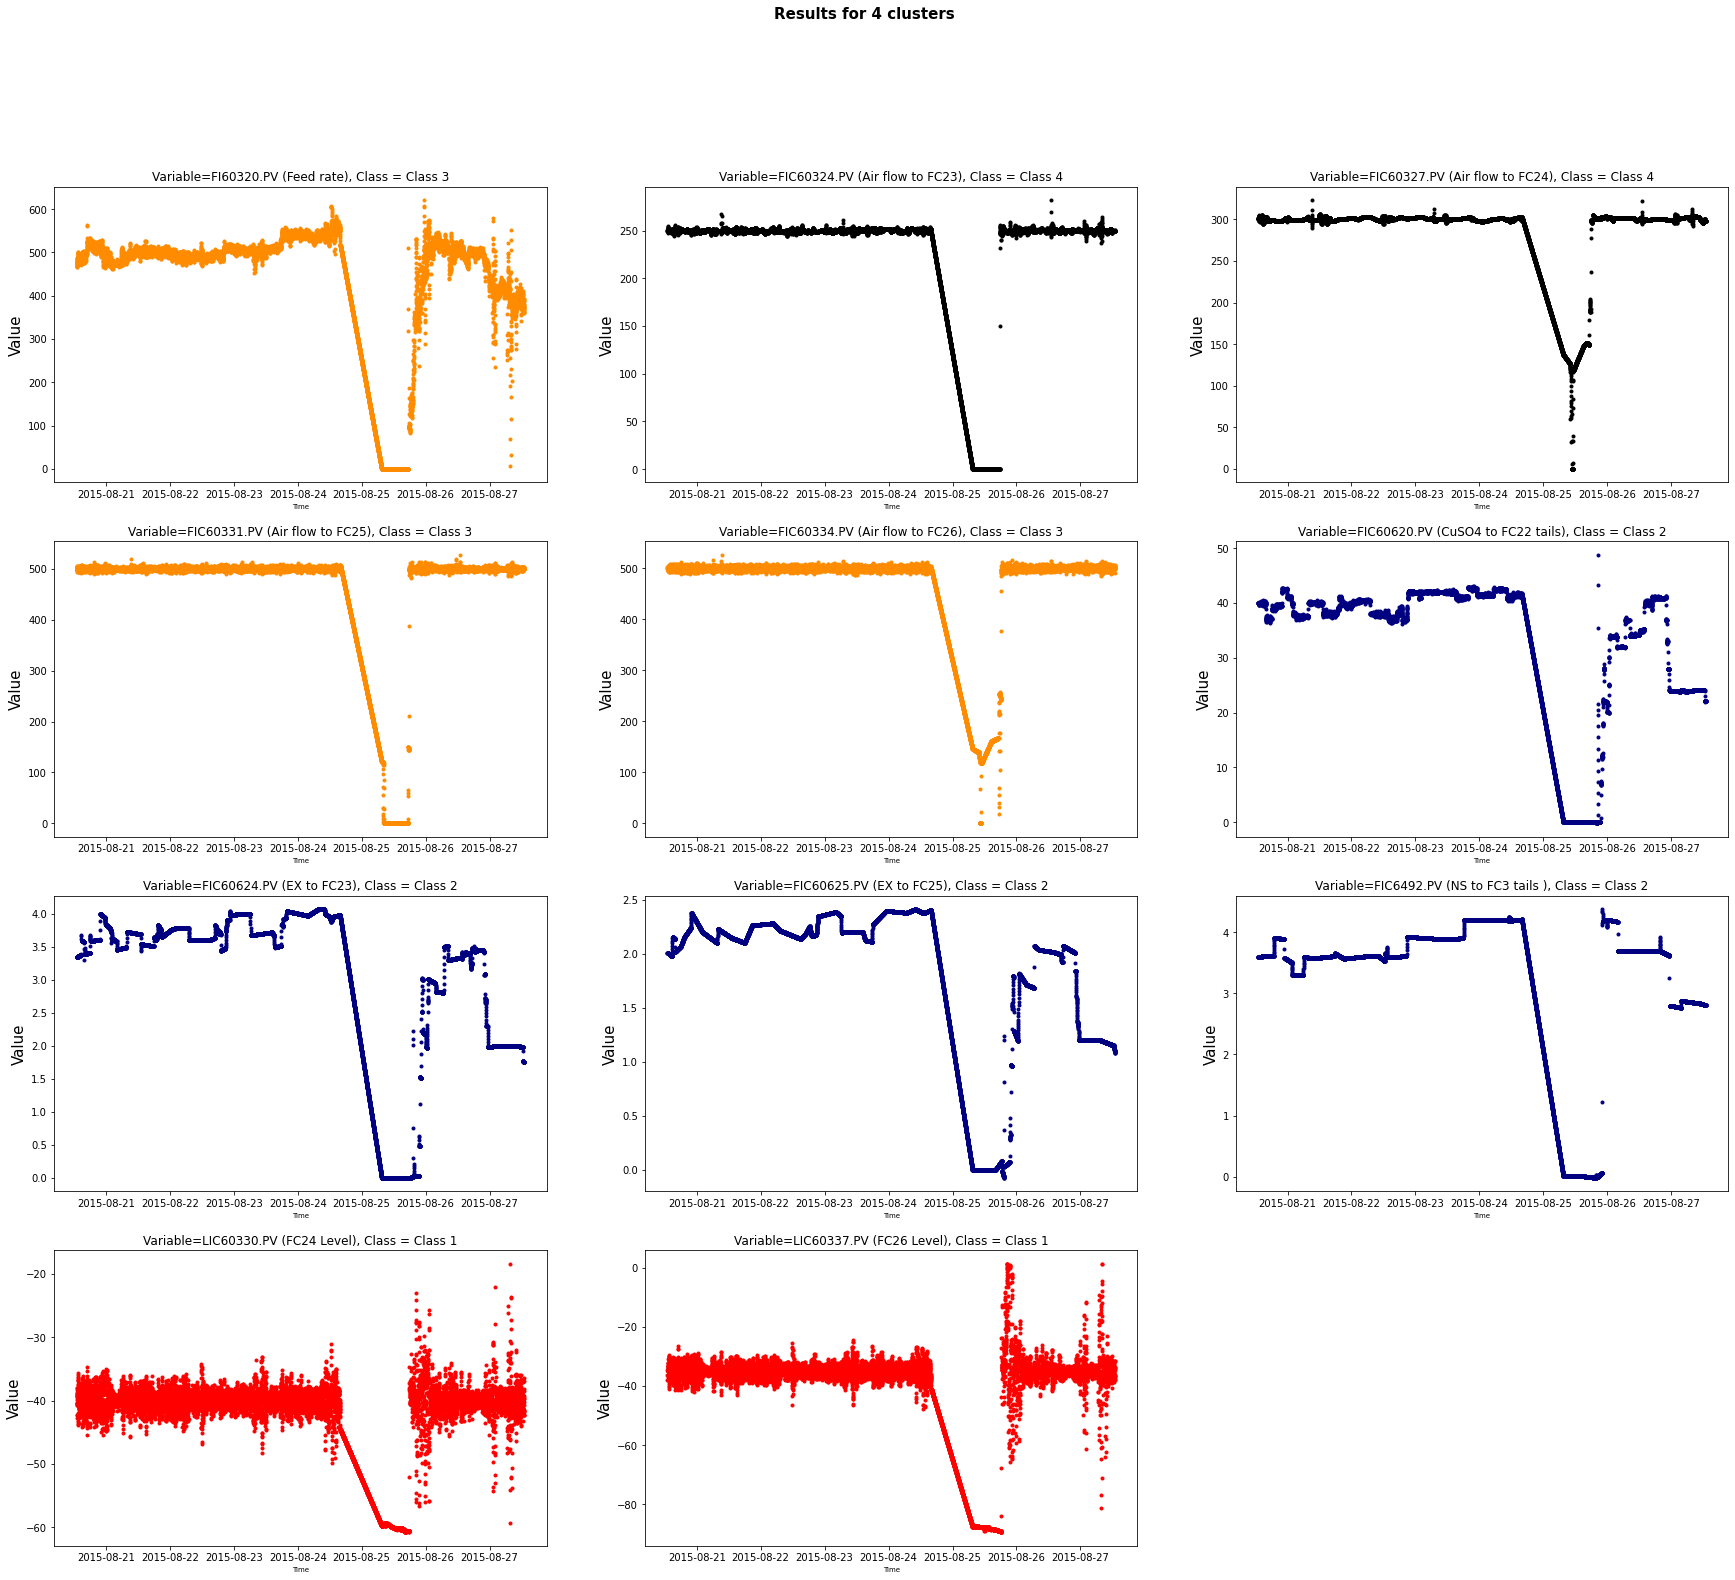

In [ ]:
plt.figure(figsize=(30,25))
#k_dict = {'1':0,'2':0,'3':1,'4':1,'5':2,'6':2}
colors = ['darkorange'] + ['k']* 2 + ['darkorange']*2+ ['navy'] *4 +['red']*2
Names = ['Class 3']+['Class 4']*2+['Class 3']*2+['Class 2']*4 +['Class 1'] *2
for j in range(1,12):
    plt.subplot(4,3,j)
    #k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x, data_array[j-1],'.',color=colors[j-1])
    plt.ylabel('Value',fontsize=15)
    plt.xlabel('Time',fontsize=7)
    plt.title('Variable=%s, Class = %s'%(df_input_pvs.columns[j-1] + ' (' + df_descriptions[df_input_pvs.columns[j-1]]['Description'] + ')',Names[j-1]),fontsize=12)

plt.suptitle("Results for 4 clusters", fontsize = 15, fontweight="bold")
plt.show();